# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_excel('C:\\Users\\hp\\Downloads\\ML projects\\Flight-Price-Prediction-master\\Data_Train.XLSX')
train_data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [7]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
3h 25m       1
31h 50m      1
28h 30m      1
33h 20m      1
29h 30m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.dropna(inplace = True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

In [10]:
train_data.shape

(10682, 11)

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [11]:
train_data["Journey_day"] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [12]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [13]:
train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey_day  Journey_month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [14]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [15]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [16]:
train_data.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [17]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [18]:
train_data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15  
2       25             4           25  
3        5            23           30  
4       50            21           35

In [19]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [20]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [21]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [22]:
train_data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   
3         No info   6218           12              5        18        5   
4         No info  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [24]:
import pandas_profiling 

In [25]:
# pandas_profiling.ProfileReport(train_data)

In [26]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

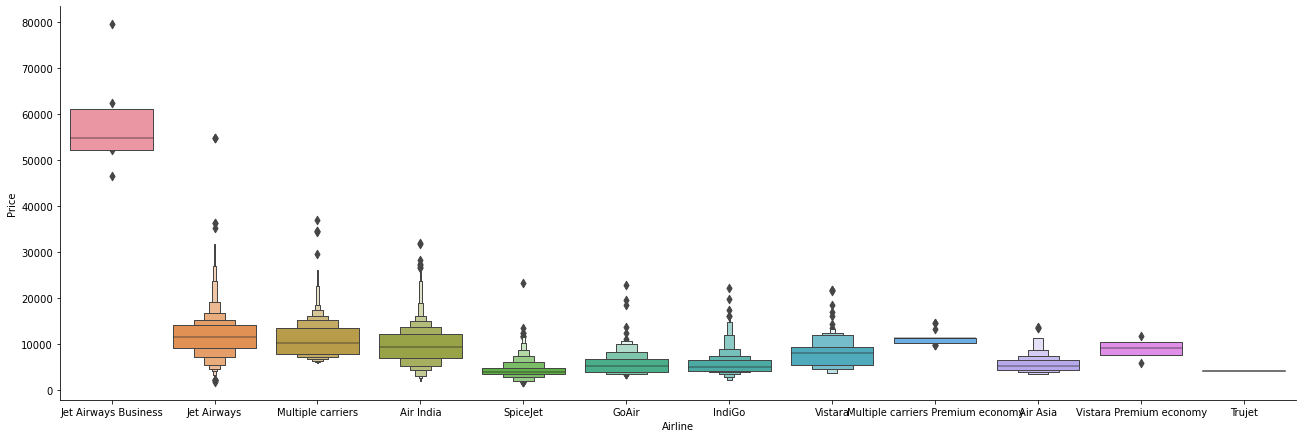

In [27]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False) , kind="boxen", height = 6, aspect = 3)
plt.show()

In [45]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

# Airline = train_data[["Airline"]]
Airline = pd.get_dummies(train_data.Airline, drop_first= True)

# Airline.head()

In [46]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [47]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

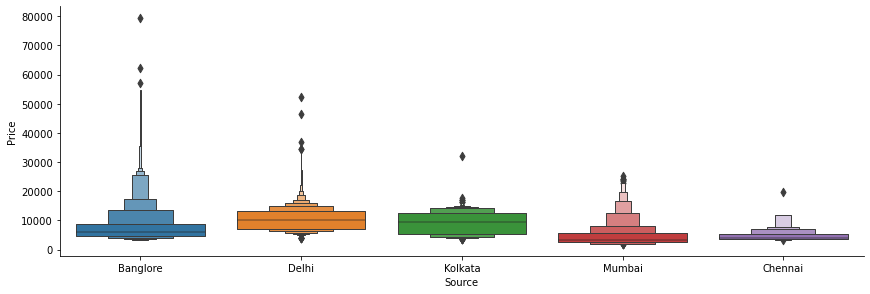

In [48]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [49]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

# Source = train_data[["Source"]]

Source = pd.get_dummies(train_data.Source, drop_first= True)

# Source.head()

In [50]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [51]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

# Destination = train_data[["Destination"]]

Destination = pd.get_dummies(train_data.Destination, drop_first = True)

# Destination.head()

In [52]:
train_data['Additional_Info'].unique()

KeyError: 'Additional_Info'

In [53]:
train_data[["Route"]]

KeyError: "None of [Index(['Route'], dtype='object')] are in the [columns]"

In [54]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

KeyError: "['Route' 'Additional_Info'] not found in axis"

In [55]:
train_data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [56]:
train_data["Total_Stops"].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [57]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [58]:
train_data.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [59]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [60]:
data_train.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  Air India  GoAir  IndiGo  Jet Airways  \
0               2             50          0      0       1            0   
1               7             25          1      0       0            0   
2              19              0          0      0       0            1   
3               5             25          0      0       1            0   
4               4             45          0      0       1            0   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                     0                  0                                  0   
1                     0                  0                                  0   
2                     0                  0                                  0   
3                     0                  0                                  0   
4                     0                  0                                  0   

   SpiceJet  Trujet  Vistara  Vistara Premium economy  Chennai  Delhi  \
0         0       0        0                        0        0      0   
1         0       0        0                        0        0      0   
2         0       0        0                        0        0      1   
3         0       0        0                        0        0      0   
4         0       0        0                        0        0      0   

   Kolkata  Mumbai  Cochin  Delhi  Hyderabad  Kolkata  New Delhi  
0        0       0       0      0          0        0          1  
1        1       0       0      0          0        0          0  
2        0       0       1      0          0        0          0  
3        1       0       0      0          0        0          0  
4        0       0       0      0          0        0          1

In [61]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [62]:
data_train.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  Air India  GoAir  \
0             1           10               2             50          0      0   
1            13           15               7             25          1      0   
2             4           25              19              0          0      0   
3            23           30               5             25          0      0   
4            21           35               4             45          0      0   

   IndiGo  Jet Airways  Jet Airways Business  Multiple carriers  \
0       1            0                     0                  0   
1       0            0                     0                  0   
2       0            1                     0                  0   
3       1            0                     0                  0   
4       1            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  0         0       0        0   
1                                  0         0       0        0   
2                                  0         0       0        0   
3                                  0         0       0        0   
4                                  0         0       0        0   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      0        0       0       0      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      0        1       0       0      0   
4                        0        0      0        0       0       0      0   

   Hyderabad  Kolkata  New Delhi  
0          0        0          1  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          1

In [63]:
data_train.shape

(10682, 30)

In [64]:
data_train.to_csv('C:\\Users\\hp\\Downloads\\ML projects\\Flight-Price-Prediction-master\\final_data_train.csv')

## Test set

In [65]:
test_data = pd.read_excel('C:\\Users\\hp\\Downloads\\ML projects\\Flight-Price-Prediction-master\\Test_set.XLSX')

In [66]:
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [67]:
test_data.shape

(2671, 10)

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [69]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [70]:
# Preprocessing

print(test_data.info())
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [71]:
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [74]:
# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data['Date_of_Journey'], format = '%d/%m/%Y').dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = '%d/%m/%Y').dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)
test_data

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)
test_data

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops , LableEncodiny bcz of ordinal data
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_test.shape

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


(2671, 28)

In [75]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India  GoAir  IndiGo  \
0           25              10             55          0      0       0   
1           20               4              0          0      0       1   
2            0              23             45          0      0       0   
3            0              13              0          0      0       0   
4           45               2             50          0      0       0   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            1                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  1   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Vistara  \
0                                  0         0        0   
1                                  0         0        0   
2                                  0         0        0   
3                                  0         0        0   
4                                  0         0        0   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      1        0       0       1      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      1        0       0       1      0   
4                        0        0      0        0       0       0      1   

   Hyderabad  Kolkata  New Delhi  
0          0        0          0  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          0

In [76]:
data_test.to_csv('C:\\Users\\hp\\Downloads\\ML projects\\Flight-Price-Prediction-master\\final_data_test.csv')

In [11]:
data_train = pd.read_csv('final_data_train.csv')
data_train
# pd.read_csv('final_data_test.csv')

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0   3897           24              3        22       20   
1                2   7662            1              5         5       50   
2                2  13882            9              6         9       25   
3                1   6218           12              5        18        5   
4                1  13302            1              3        16       50   
...            ...    ...          ...            ...       ...      ...   
10677            0   4107            9              4        19       55   
10678            0   4145           27              4        20       45   
10679            0   7229           27              4         8       20   
10680            0  12648            1              3        11       30   
10681            2  11753            9              5        10       55   

       Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0                 1           10               2             50  ...   
1                13           15               7             25  ...   
2                 4           25              19              0  ...   
3                23           30               5             25  ...   
4                21           35               4             45  ...   
...             ...          ...             ...            ...  ...   
10677            22           25               2             30  ...   
10678            23           20               2             35  ...   
10679            11           20               3              0  ...   
10680            14           10               2             40  ...   
10681            19           15               8             20  ...   

       Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  \
0                            0        0      0        0       0       0   
1                            0        0      0        1       0       0   
2                            0        0      1        0       0       1   
3                            0        0      0        1       0       0   
4                            0        0      0        0       0       0   
...                        ...      ...    ...      ...     ...     ...   
10677                        0        0      0        1       0       0   
10678                        0        0      0        1       0       0   
10679                        0        0      0        0       0       0   
10680                        0        0      0        0       0       0   
10681                        0        0      1        0       0       1   

       Delhi.1  Hyderabad  Kolkata.1  New Delhi  
0            0          0          0          1  
1            0          0          0          0  
2            0          0          0          0  
3            0          0          0          0  
4            0          0          0          1  
...        ...        ...        ...        ...  
10677        0          0          0          0  
10678        0          0          0          0  
10679        1          0          0          0  
10680        0          0          0          1  
10681        0          0          0          0  

[10682 rows x 30 columns]

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [12]:
x = data_train.drop(columns='Price',axis=1)
y = data_train['Price']

In [13]:
import matplotlib.pyplot as plt

In [15]:
data_train

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                0   3897           24              3        22       20   
1                2   7662            1              5         5       50   
2                2  13882            9              6         9       25   
3                1   6218           12              5        18        5   
4                1  13302            1              3        16       50   
...            ...    ...          ...            ...       ...      ...   
10677            0   4107            9              4        19       55   
10678            0   4145           27              4        20       45   
10679            0   7229           27              4         8       20   
10680            0  12648            1              3        11       30   
10681            2  11753            9              5        10       55   

       Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0                 1           10               2             50  ...   
1                13           15               7             25  ...   
2                 4           25              19              0  ...   
3                23           30               5             25  ...   
4                21           35               4             45  ...   
...             ...          ...             ...            ...  ...   
10677            22           25               2             30  ...   
10678            23           20               2             35  ...   
10679            11           20               3              0  ...   
10680            14           10               2             40  ...   
10681            19           15               8             20  ...   

       Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  \
0                            0        0      0        0       0       0   
1                            0        0      0        1       0       0   
2                            0        0      1        0       0       1   
3                            0        0      0        1       0       0   
4                            0        0      0        0       0       0   
...                        ...      ...    ...      ...     ...     ...   
10677                        0        0      0        1       0       0   
10678                        0        0      0        1       0       0   
10679                        0        0      0        0       0       0   
10680                        0        0      0        0       0       0   
10681                        0        0      1        0       0       1   

       Delhi.1  Hyderabad  Kolkata.1  New Delhi  
0            0          0          0          1  
1            0          0          0          0  
2            0          0          0          0  
3            0          0          0          0  
4            0          0          0          1  
...        ...        ...        ...        ...  
10677        0          0          0          0  
10678        0          0          0          0  
10679        1          0          0          0  
10680        0          0          0          1  
10681        0          0          0          0  

[10682 rows x 30 columns]

In [138]:
# pandas_profiling.ProfileReport(train_data)

In [137]:
train_data.corr()

Total_Stops     Price  Journey_day  Journey_month  Dep_hour  \
Total_Stops        1.000000  0.603897    -0.009451       0.054383 -0.061476   
Price              0.603897  1.000000    -0.153774      -0.103643  0.006799   
Journey_day       -0.009451 -0.153774     1.000000      -0.038359  0.002170   
Journey_month      0.054383 -0.103643    -0.038359       1.000000  0.039127   
Dep_hour          -0.061476  0.006799     0.002170       0.039127  1.000000   
Dep_min           -0.002618 -0.024458    -0.008170      -0.059267 -0.024745   
Arrival_hour       0.038140  0.024244    -0.003245      -0.003927  0.005180   
Arrival_min       -0.106940 -0.086155    -0.017510      -0.100626  0.067911   
Duration_hours     0.739916  0.508778    -0.022059       0.016141  0.002869   
Duration_mins     -0.136706 -0.124855    -0.008940      -0.040897 -0.023707   

                 Dep_min  Arrival_hour  Arrival_min  Duration_hours  \
Total_Stops    -0.002618      0.038140    -0.106940        0.739916   
Price          -0.024458      0.024244    -0.086155        0.508778   
Journey_day    -0.008170     -0.003245    -0.017510       -0.022059   
Journey_month  -0.059267     -0.003927    -0.100626        0.016141   
Dep_hour       -0.024745      0.005180     0.067911        0.002869   
Dep_min         1.000000      0.043122    -0.017597       -0.022104   
Arrival_hour    0.043122      1.000000    -0.154363        0.055276   
Arrival_min    -0.017597     -0.154363     1.000000       -0.074450   
Duration_hours -0.022104      0.055276    -0.074450        1.000000   
Duration_mins   0.092485     -0.118309     0.151628       -0.126468   

                Duration_mins  
Total_Stops         -0.136706  
Price               -0.124855  
Journey_day         -0.008940  
Journey_month       -0.040897  
Dep_hour            -0.023707  
Dep_min              0.092485  
Arrival_hour        -0.118309  
Arrival_min          0.151628  
Duration_hours      -0.126468  
Duration_mins        1.000000

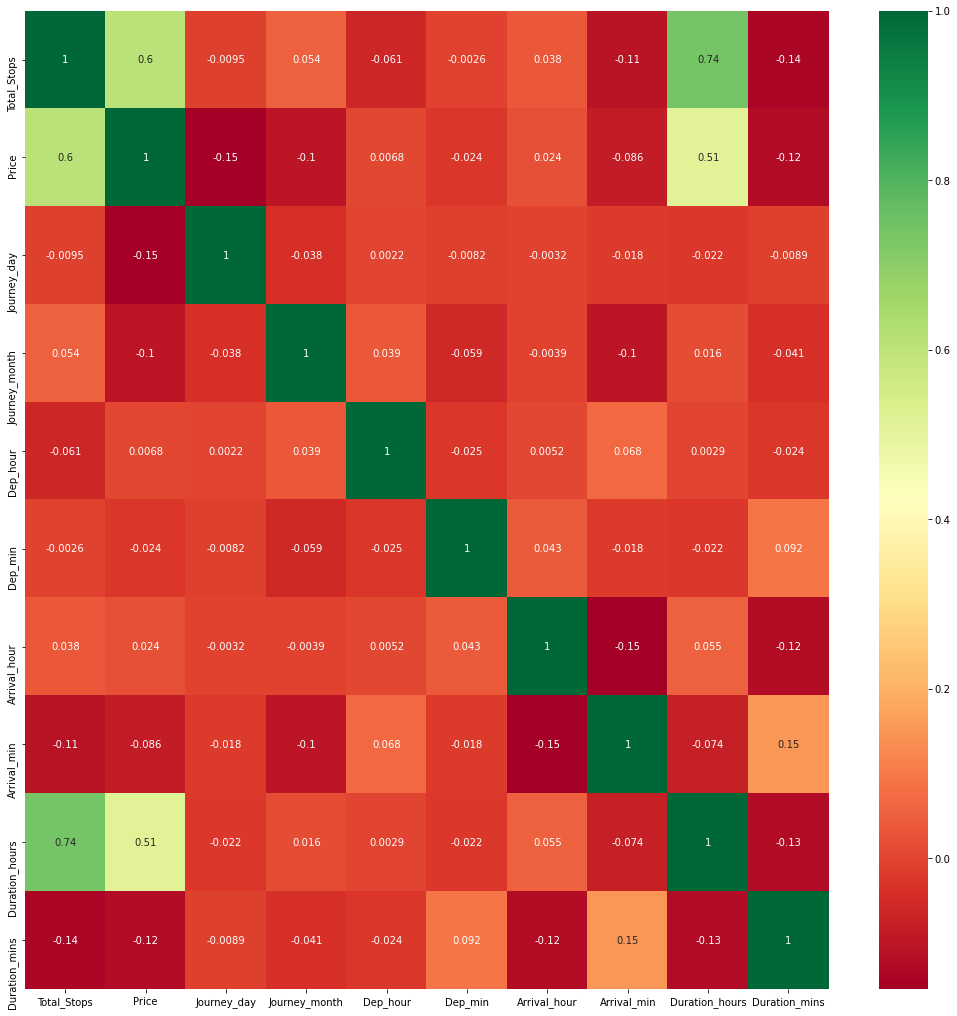

In [143]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [48]:
# # Important feature using ExtraTreesRegressor

# from sklearn.ensemble import ExtraTreesRegressor
# selection = ExtraTreesRegressor()
# selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [49]:
# print(selection.feature_importances_)

[1.95434120e-01 1.44021586e-01 5.38555703e-02 2.40539410e-02
 2.17430940e-02 2.73470116e-02 1.96095029e-02 1.27500039e-01
 1.74337150e-02 1.06741541e-02 1.87128973e-03 1.65718507e-02
 1.51364596e-01 6.81637760e-02 1.89902192e-02 8.47326514e-04
 3.10615675e-03 1.08644888e-04 5.29446496e-03 9.35369428e-05
 6.27777871e-04 1.23137157e-02 3.24867396e-03 8.91085147e-03
 1.41174133e-02 1.95895945e-02 7.68279226e-03 4.01014841e-04
 2.50235698e-02]


In [145]:
# #plot graph of feature importances for better visualization

# plt.figure(figsize = (12,8))
# feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
# feat_importances.plot(kind='barh')
# plt.show()


NameError: name 'selection' is not defined

<Figure size 864x576 with 0 Axes>

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
y_pred = model_rf.predict(x_test)
y_pred

array([16844.9   ,  5497.98  ,  8835.95  , ...,  6559.81  , 12731.5575,
       12892.4365])

In [19]:
model_rf.score(x_train, y_train)

0.9531814815681179

In [20]:
model_rf.score(x_test, y_test)

0.7976227485908962

In [21]:
model_rf.feature_importances_

array([3.51269490e-02, 1.27441420e-01, 6.23331774e-02, 2.94102740e-02,
       2.26957658e-02, 3.55743119e-02, 2.21375217e-02, 4.41927708e-01,
       1.95811714e-02, 5.23670296e-03, 1.30282337e-03, 7.57391966e-03,
       6.27302391e-02, 6.31156456e-02, 2.10274553e-02, 9.18850243e-04,
       2.59397661e-03, 1.79352081e-05, 3.16735336e-03, 3.63650071e-05,
       5.58911279e-04, 2.98618518e-03, 4.47368934e-03, 3.80928667e-03,
       3.60279484e-03, 2.33105080e-04, 2.90906454e-03, 4.88958011e-04,
       1.69884399e-02])

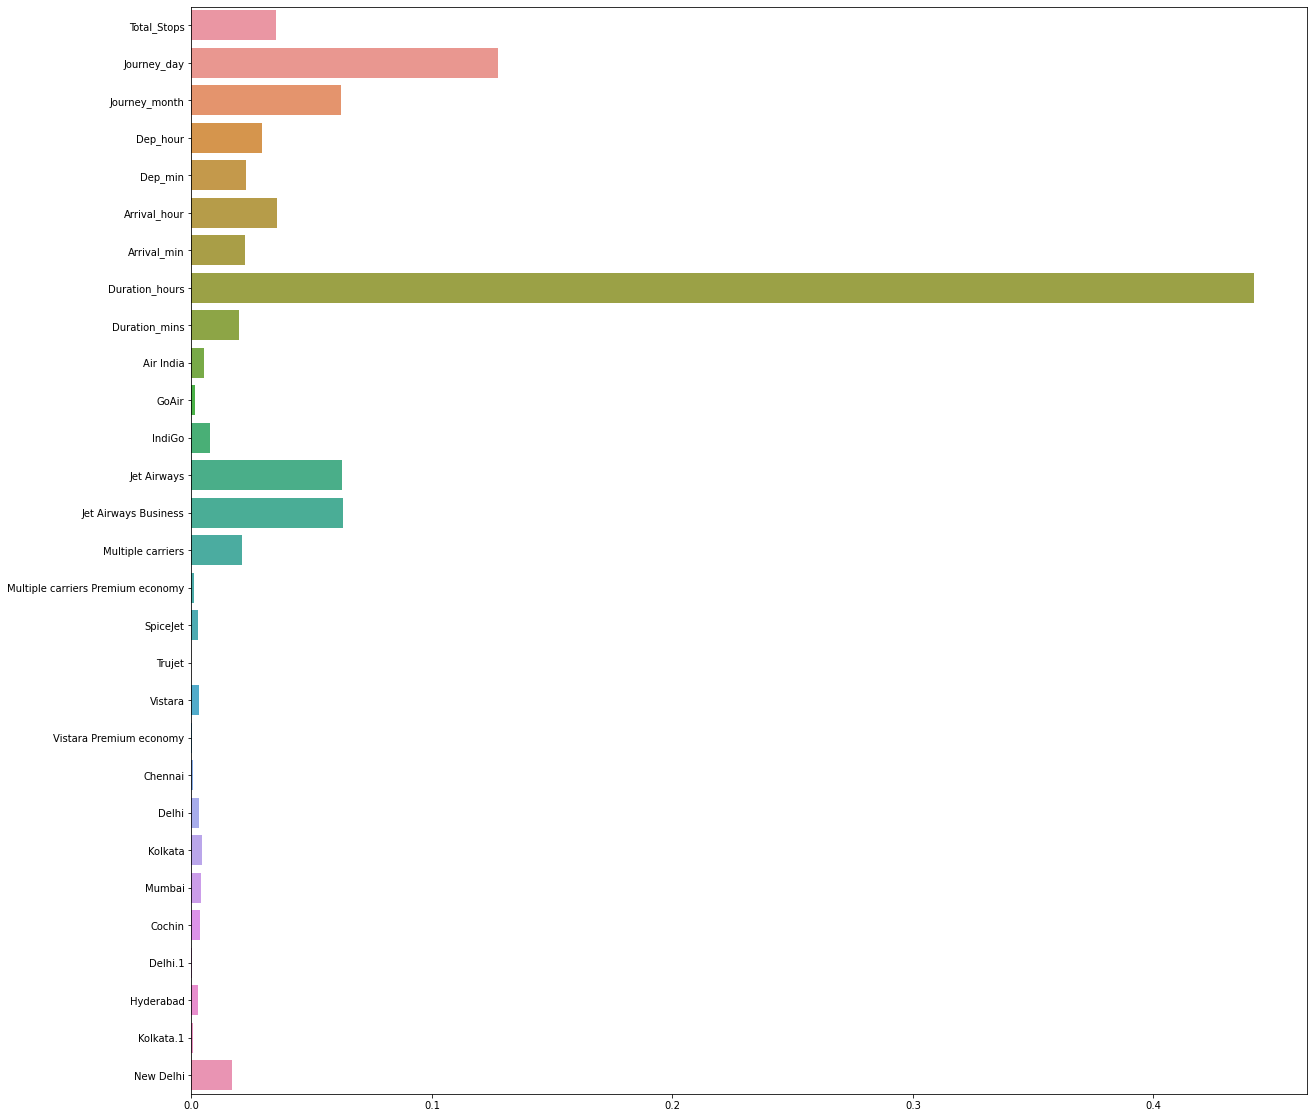

In [22]:
plt.figure(figsize=(20,20))
sns.barplot(x=model_rf.feature_importances_,y=x_train.columns)
plt.show()

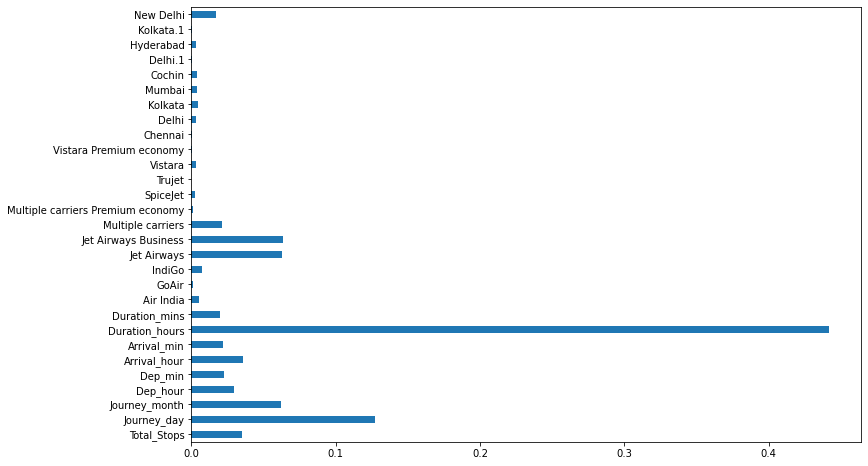

In [23]:


plt.figure(figsize = (12,8))
feat_importances = pd.Series(model_rf.feature_importances_, index=x_train.columns)
feat_importances.plot(kind='barh')
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


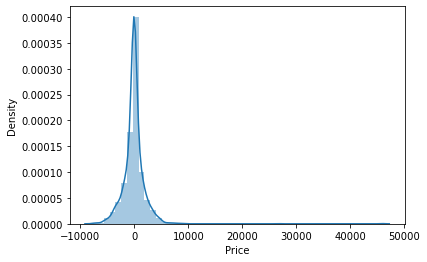

In [24]:
sns.distplot(y_test-y_pred)
plt.show()

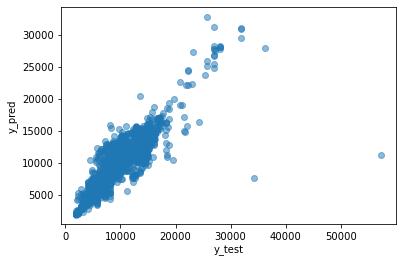

In [25]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1174.1839894143059
MSE: 4363669.693612146
RMSE: 2088.939849208719


In [28]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [29]:
metrics.r2_score(y_test, y_pred)

0.7976227485908962

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
# rand_param = {'n_estimators'=range(),
#     'criterion'='mse',
#     'max_depth'=None,
#     'min_samples'_split=2,
# '    min_samples_leaf=1,
# '    min_weight_fraction_leaf=0.0,
#     'max_features'='auto',
#     'max_leaf_nodes'=None,
#     'min_impurity_decrease'=0.0,
#     'min_impurity_split'=None,
#     'bootstrap'=True,
#     'oob_score'=False,
#     'n_jobs'=None,
#     'random_state'=None,
#     'verbose'=0,
#     'warm_start'=False,
#     'ccp_alpha'=0.0,
#     'max_samples'=None,}

In [31]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [40]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [52]:
model_rf = RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_depth=20)

In [53]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [55]:
model_rf.score(x_train,y_train)

0.8959080787031023

In [56]:
model_rf.score(x_test,y_test)

0.8123237118972852

In [59]:
prediction = model_rf.predict(x_test)
prediction

array([16997.56293339,  5698.00399822,  8649.35981505, ...,
        6797.79825489, 12546.89158894, 12471.15121164])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


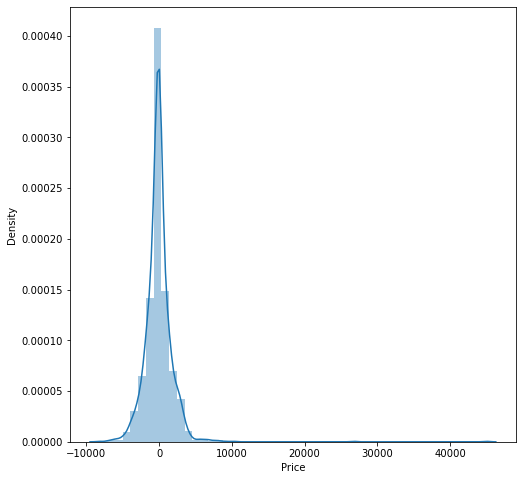

In [60]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

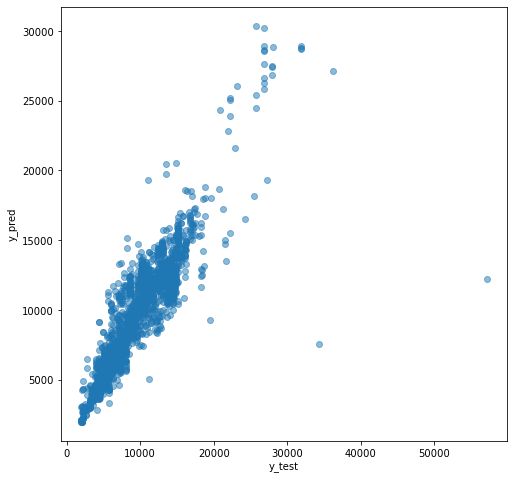

In [61]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.0971483512049
MSE: 4046686.6947803507
RMSE: 2011.637814016318


## Save the model to reuse it again

In [63]:
import pickle
# open a file, where you ant to store the data
file = open('model_rf.pkl', 'wb')

# dump information to that file
pickle.dump(model_rf, file)

In [66]:
# model = open('flight_rf.pkl','rb')
# forest = pickle.load(model)

In [68]:
model = pickle.load(open('model_rf.pkl','rb'))

In [71]:
y_pred = model.predict(x_test)
y_pred

array([16997.56293339,  5698.00399822,  8649.35981505, ...,
        6797.79825489, 12546.89158894, 12471.15121164])

In [72]:
metrics.r2_score(y_test, y_pred)

0.8123237118972852